<a href="https://colab.research.google.com/github/Msingh0001/punjab-water-crop-analysis-/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<xarray.Dataset> Size: 2GB
Dimensions:        (lon: 720, lat: 360, time: 243, bounds: 2)
Coordinates:
  * lon            (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * lat            (lat) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2kB 2002-04-17T12:00:00 ... 2025-03-...
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 504MB ...
    uncertainty    (time, lat, lon) float64 504MB ...
    lat_bounds     (lat, bounds) float64 6kB ...
    lon_bounds     (lon, bounds) float64 12kB ...
    time_bounds    (time, bounds) datetime64[ns] 4kB ...
    land_mask      (lat, lon) float64 2MB ...
    scale_factor   (lat, lon) float64 2MB ...
    mascon_ID      (lat, lon) float64 2MB ...
    GAD            (time, lat, lon) float64 504MB ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0

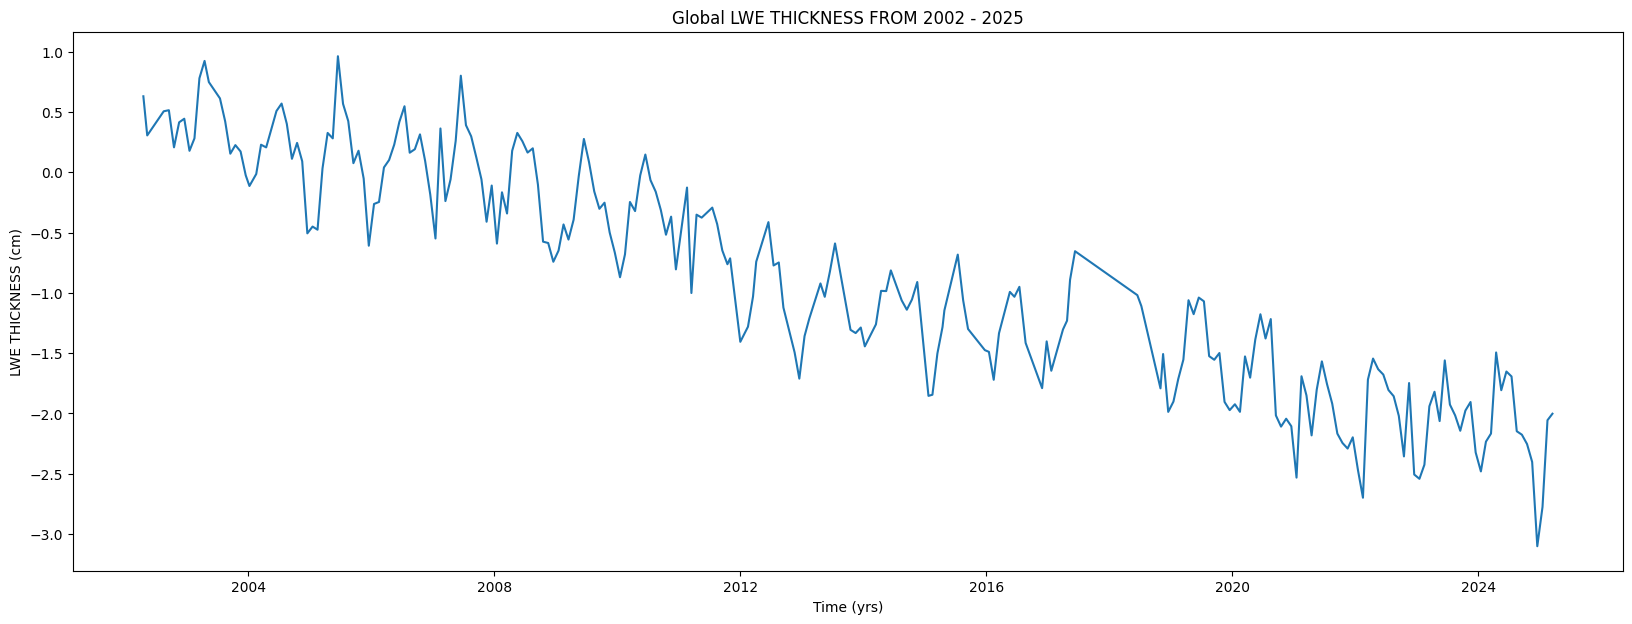

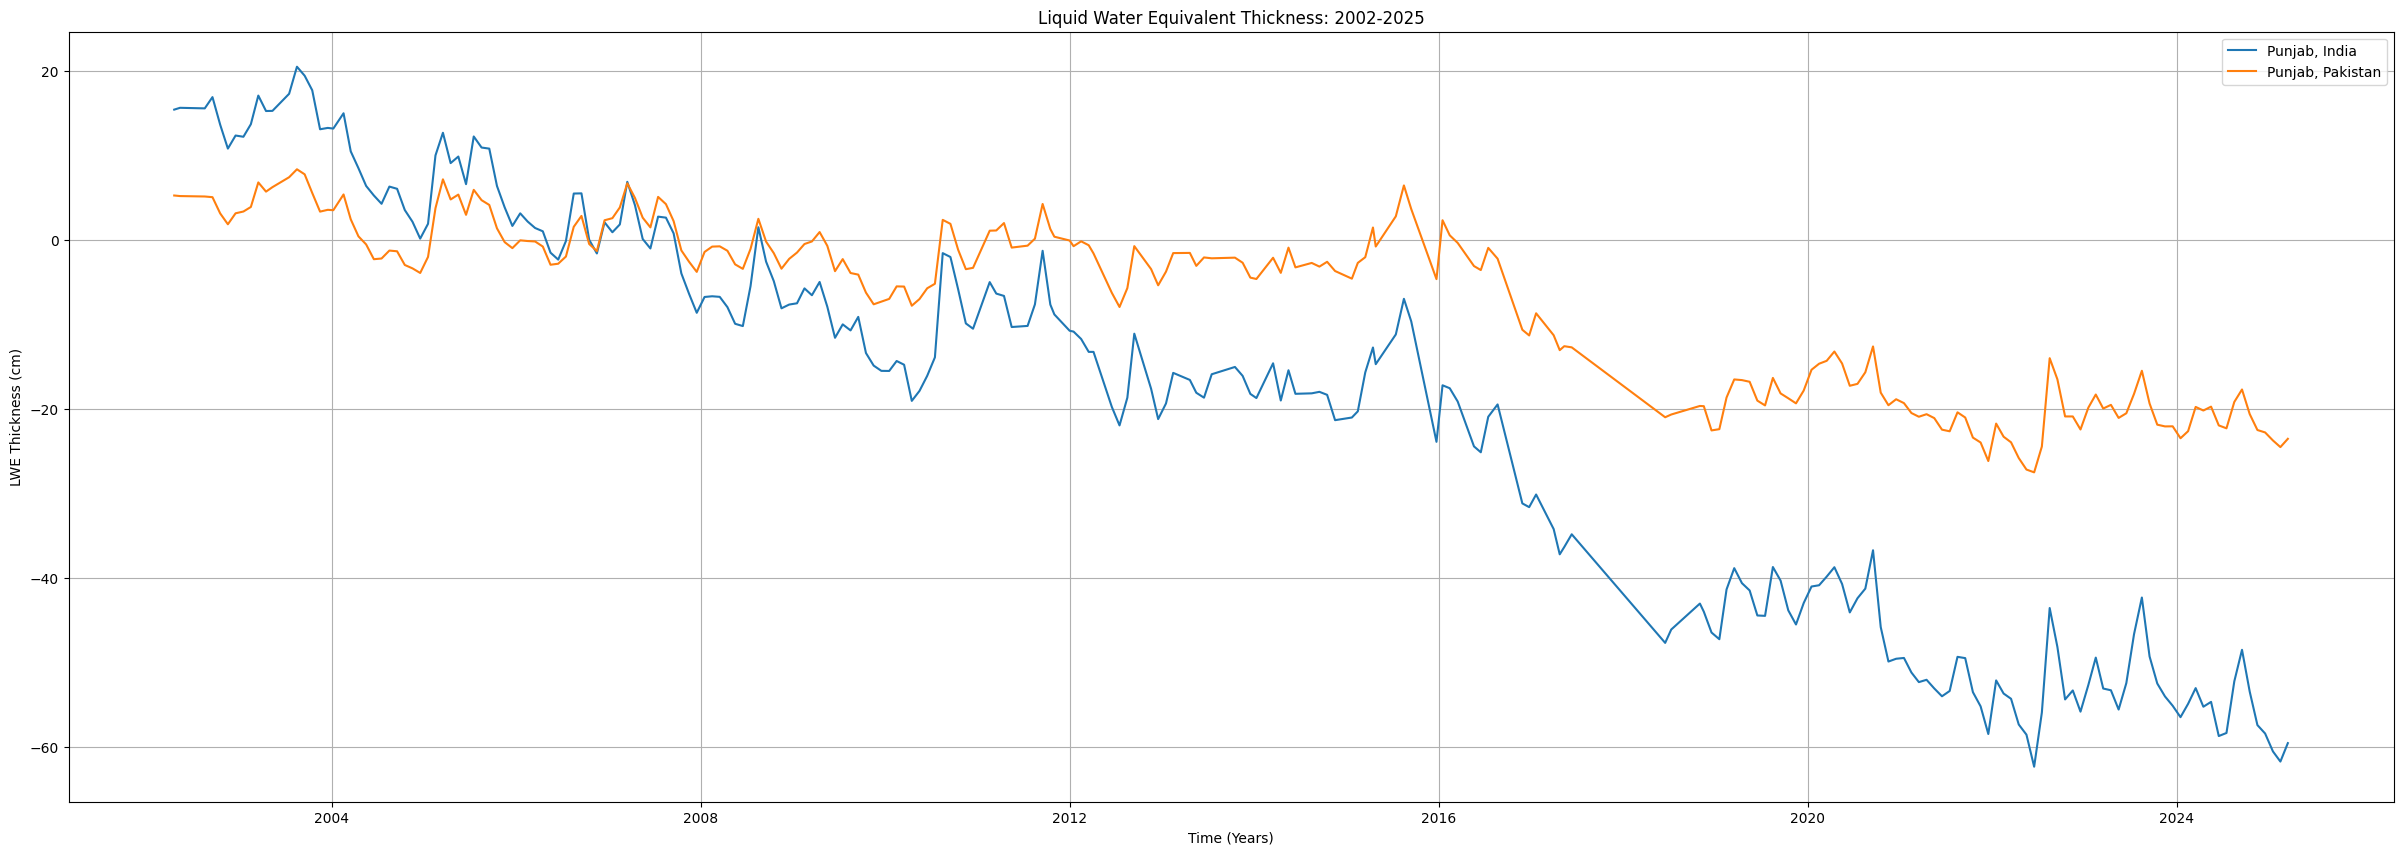

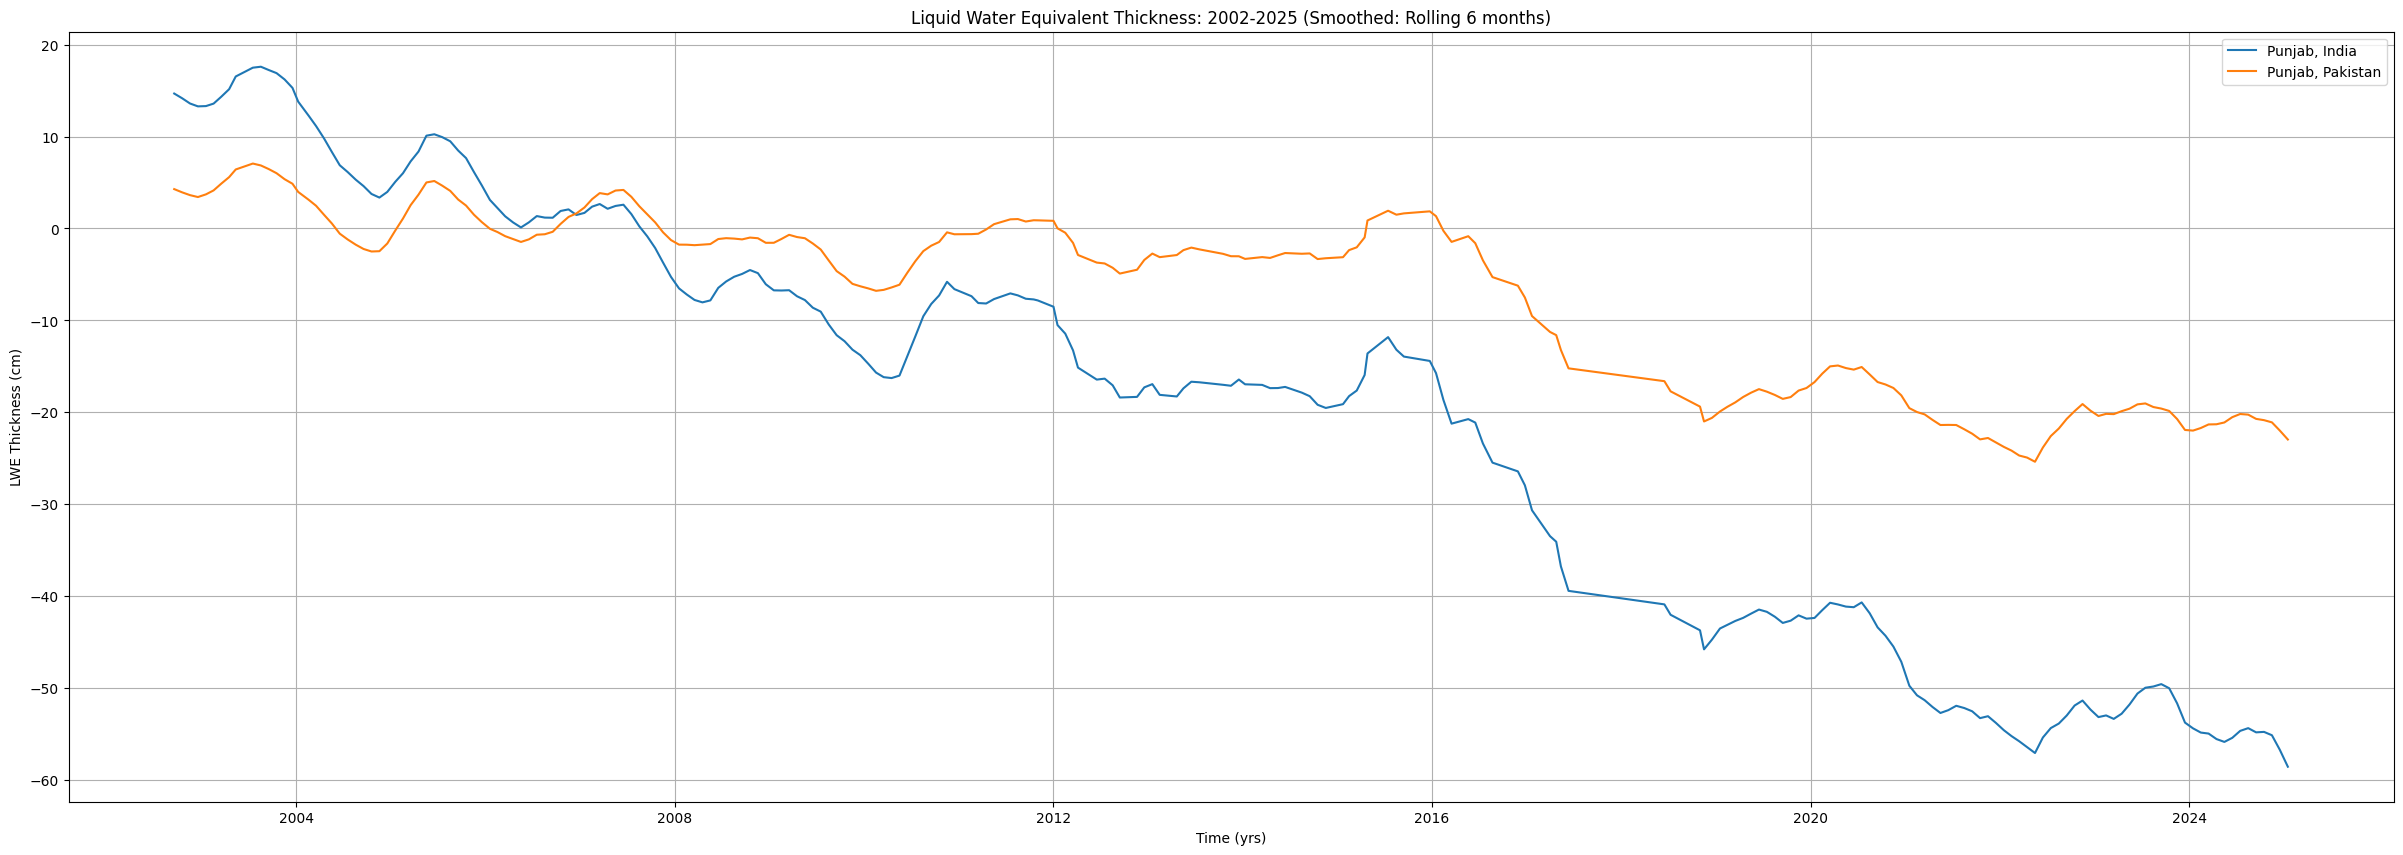

In [22]:
# Install and import required libraries
!pip install xarray netCDF4 matplotlib
import xarray as xr
import matplotlib.pyplot as pd

# Load the GRACE satellite dataset (2002–2025) which measures water storage changes
data = xr.open_dataset('/content/GRCTellus.JPL.200204_202503.GLO.RL06.3M.MSCNv04CRI.nc')

# Quick look at dataset variables and structure
print(data)
data.data_vars

# Extract the first time step (early 2002) and calculate average LWE thickness globally
first_lwe = data['lwe_thickness'].isel(time=0)
mean_lwe = first_lwe.mean().item()
print(f"Average LWE thickness globally in 2002: {mean_lwe} cm")

# Compute global mean over all time, averaging across latitude and longitude
global_mean = data['lwe_thickness'].mean(dim = ['lat', 'lon'])

# Plot the global average LWE over the entire period (2002–2025)
(global_mean).plot(figsize = (20, 7))
pd.title("Global LWE THICKNESS FROM 2002 - 2025")
pd.xlabel("Time (yrs)")
pd.ylabel("LWE THICKNESS (cm)")
pd.plot()

# Select Punjab, India region based on latitude and longitude slices
India_punjab = data.sel(
    lat = slice(29.5, 32.3),
    lon = slice(73.9, 76.9)
)
print(India_punjab)

# Select Punjab, Pakistan region (same lat range, different lon range)
Pakistan_punjab = data.sel(
    lat = slice(29.5,32.3),
    lon = slice(70.8, 73.8)
)

# Compute average LWE time series for both regions (mean across lat/lon)
IP_mean = India_punjab['lwe_thickness'].mean(dim = ['lat', 'lon'])
PP_mean = Pakistan_punjab['lwe_thickness'].mean(dim = ['lat', 'lon'])

# Plot raw (unsmoothed) time series for both regions to see overall trends
pd.figure(figsize = (30,10))
IP_mean.plot(label = "Punjab, India")
PP_mean.plot(label = "Punjab, Pakistan")
pd.title("Liquid Water Equivalent Thickness: 2002-2025")
pd.xlabel("Time (Years)")
pd.ylabel("LWE Thickness (cm)")
pd.legend()
pd.grid()
pd.show()

# Apply rolling mean (6 months) to smooth short-term fluctuations
IP_smoothed = IP_mean.rolling(time=6, center = True).mean()
PP_smoothed = PP_mean.rolling(time=6, center = True).mean()

# Plot smoothed time series to better highlight long-term trends
pd.figure(figsize = (30,10))
IP_smoothed.plot(label = "Punjab, India")
PP_smoothed.plot(label = "Punjab, Pakistan")
pd.title("Liquid Water Equivalent Thickness: 2002-2025 (Smoothed: Rolling 6 months)")
pd.xlabel("Time (yrs)")
pd.ylabel ("LWE Thickness (cm)")
pd.grid()
pd.legend()
pd.show()
